# IMPORTING LIB

In [1]:
import os
import numpy as np
import pyroomacoustics as pra
from scipy.io import wavfile
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from IPython.display import Audio

# SOURCE GENERATION

In [2]:
# Set the sampling frequency (assumed to be constant for all files)
fs = 44100

# Desired duration in seconds for all samples
dur_seconds = 5

# Calculate the number of samples required to achieve the desired duration
dur_samples = int(dur_seconds * fs)

# Define the folder path where the audio files are located
folder_path = "audio/"

# Find all the audio files in the folder
audio_files = [file for file in os.listdir(folder_path) if file.endswith(".wav")]

# Create a list to store the normalized and trimmed audio samples
audio_samples = []

# Iterate over each audio file
for file in audio_files:
    # Load the file path for the current audio file
    file_path = os.path.join(folder_path, file)
    
    # Read the audio file
    _, audio = wavfile.read(file_path)  # Here, we're not using the sampling frequency returned by wavfile.read as we've assumed it's constant

    if len(audio) > dur_samples:
        cut_audio = audio[:dur_samples]
        
        # Normalize the audio sample
        cut_audio = cut_audio / abs(cut_audio).max()
        audio_samples.append(cut_audio)

    else:
        # Normalize the audio sample
        audio = audio / abs(audio).max()
        audio_samples.append(audio)
    

/var/folders/4w/35nmcx750fl0p5v_tymchpx40000gp/T/ipykernel_46858/2321524970.py:25: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, audio = wavfile.read(file_path)  # Here, we're not using the sampling frequency returned by wavfile.read as we've assumed it's constant


In [3]:
# Set the sampling frequency (assumed to be constant for all files)
fs = 44100

# Desired duration in seconds for all samples
dur_seconds = 5

# Calculate the number of samples required to achieve the desired duration
dur_samples = int(dur_seconds * fs)

# Define the folder path where the audio files are located
folder_path = "audio/"

# Find all the audio files in the folder
audio_files = [file for file in os.listdir(folder_path) if file.endswith(".wav")]

# Create a list to store the normalized and trimmed audio samples
audio_samples = []


# Iterate over each audio file
for file in audio_files:
    # Load the file path for the current audio file
    file_path = os.path.join(folder_path, file)
    
    # Read the audio file
    _, audio = wavfile.read(file_path)  # Here, we're not using the sampling frequency returned by wavfile.read as we've assumed it's constant
    
    # Trim or extend(zero-pad) the audio sample to match the desired duration
    if len(audio) < dur_samples:
        padded_audio = np.pad(audio, (0, dur_samples - len(audio)), mode='constant')
            
        # Normalize the audio sample
        padded_audio = padded_audio / abs(padded_audio).max()
        audio_samples.append(padded_audio)

    elif len(audio) > dur_samples:
        cut_audio = audio[:dur_samples]
            
        # Normalize the audio sample
        cut_audio = cut_audio / abs(cut_audio).max()
        audio_samples.append(cut_audio)

    else:
            
        # Normalize the audio sample
        audio = audio / abs(audio).max()
        audio_samples.append(audio)

# Now audio_samples contains all the normalized and trimmed audio samples, each having a duration of 5 seconds


/var/folders/4w/35nmcx750fl0p5v_tymchpx40000gp/T/ipykernel_46858/3939679278.py:26: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, audio = wavfile.read(file_path)  # Here, we're not using the sampling frequency returned by wavfile.read as we've assumed it's constant


In [4]:
# Iterate over each audio file and its corresponding sample
for file, sample in zip(audio_files, audio_samples):
    # Print the file name
    print("Playing:", file)
    
    # Play the audio sample
    display(Audio(data=sample, rate=fs, autoplay=False))

Playing: voice2.wav


Playing: voice3.wav


Playing: voice1.wav


Playing: piano2.wav


Playing: piano1.wav


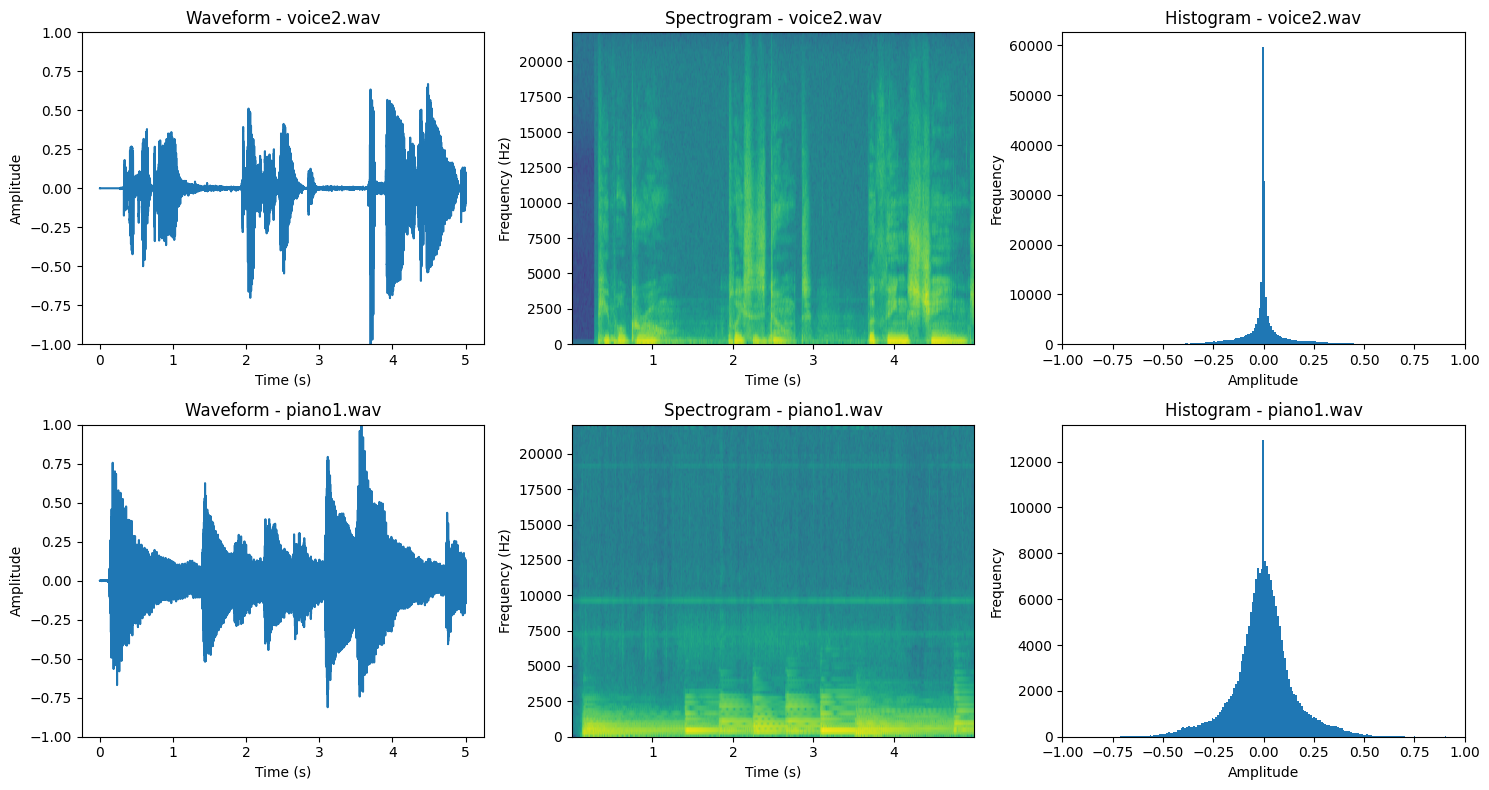

In [5]:
# Define the indices of the files you want to inspect (assuming files are 0-indexed)
file_indices_to_inspect = [0, 4]  # Replace with the indices of files 1 and 4

# Calculate the number of rows needed based on the number of files to inspect
num_rows = len(file_indices_to_inspect)

# Set up subplots
plt.figure(figsize=(15, 4*num_rows))

for i, idx in enumerate(file_indices_to_inspect, 1):
    # Get the audio sample and file name
    sample = audio_samples[idx]
    file_name = audio_files[idx]
    
    # Plot the waveform
    plt.subplot(num_rows, 3, i*3-2)
    plt.plot(np.arange(len(sample)) / fs, sample)
    plt.title('Waveform - ' + file_name)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.ylim(-1, 1)  # Set y-axis limits
    
    # Plot the spectrogram
    plt.subplot(num_rows, 3, i*3-1)
    plt.specgram(sample, Fs=fs, cmap='viridis')
    plt.title('Spectrogram - ' + file_name)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    
    # Plot the histogram
    plt.subplot(num_rows, 3, i*3)
    plt.hist(sample, bins=200)
    plt.title('Histogram - ' + file_name)
    plt.xlabel('Amplitude')
    plt.ylabel('Frequency')
    plt.xlim(-1,1)  # Set y-axis lower limit to 0, upper limit automatic

plt.tight_layout()
plt.show()


# ROOM CREATION

Text(0.5, 0, 'Z')

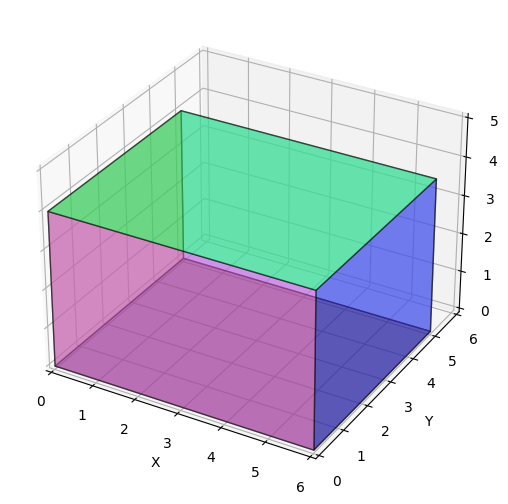

In [46]:
# Define the corners of a 2D room as an array of (x, y) coordinates
corners = np.array([[0,0], [0,5], [6,5], [6,0]]).T  # [x,y]

# Create a 2D room object from the given corners
# max_order: Maximum reflection order for ray tracing
# materials: Defines the acoustic properties of the walls (absorption coefficient, reflection coefficient)
room = pra.Room.from_corners(corners, max_order=3, materials=pra.Material(0.2, 0.15), ray_tracing=True, air_absorption=True, fs=fs)

# Set the parameters for ray tracing
# receiver_radius: Radius of the receiver for computing the visibility polygon
# n_rays: Number of rays to use for ray tracing
# energy_thres: Threshold energy for ray termination
room.set_ray_tracing(receiver_radius=0.5, n_rays=10000, energy_thres=1e-5)

# Extrude the 2D room to create a 3D room with a specified height
# materials: Defines the acoustic properties of the walls in 3D (absorption coefficient, reflection coefficient)
room.extrude(4., materials=pra.Material(0.2, 0.15))

# Plot the room
fig, ax = room.plot()
ax.set_xlim([0, 6])  # Set x-axis limits
ax.set_ylim([0, 6])  # Set y-axis limits
ax.set_zlim([0, 5])  # Set z-axis limits
ax.set_xlabel('X')  # Label for x-axis
ax.set_ylabel('Y')  # Label for y-axis
ax.set_zlabel('Z')  # Label for z-axis

Text(0.5, 0, 'Z')

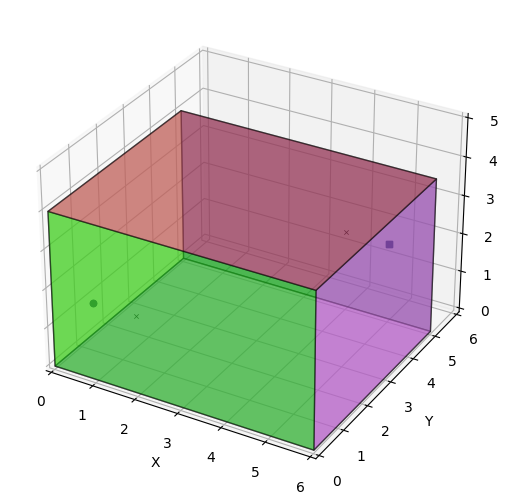

In [47]:
# Define the location of sources within the room
source1_loc = [1., 0., 2.]
source2_loc = [5., 5., 2.]

# Add source 1 to the room with a specified signal (voice1)
room.add_source(source1_loc, signal=audio_samples[0])

# Add source 2 to the room with a specified signal (noise)
room.add_source(source2_loc, signal=audio_samples[4])

# Define the positions of two microphones in 3D space
# Ensure each microphone position is specified in 3D (x, y, z) coordinates
mic_positions = np.array([[2., 4.], [0., 5.], [2., 2.]])

# Add the microphone array to the room
room.add_microphone_array(pra.MicrophoneArray(mic_positions, fs))

# Plot the room with sources and microphone array
fig, ax = room.plot()
ax.set_xlim([0, 6])  # Set x-axis limits
ax.set_ylim([0, 6])  # Set y-axis limits
ax.set_zlim([0, 5])  # Set z-axis limits
ax.set_xlabel('X')  # Label for x-axis
ax.set_ylabel('Y')  # Label for y-axis
ax.set_zlabel('Z')  # Label for z-axis


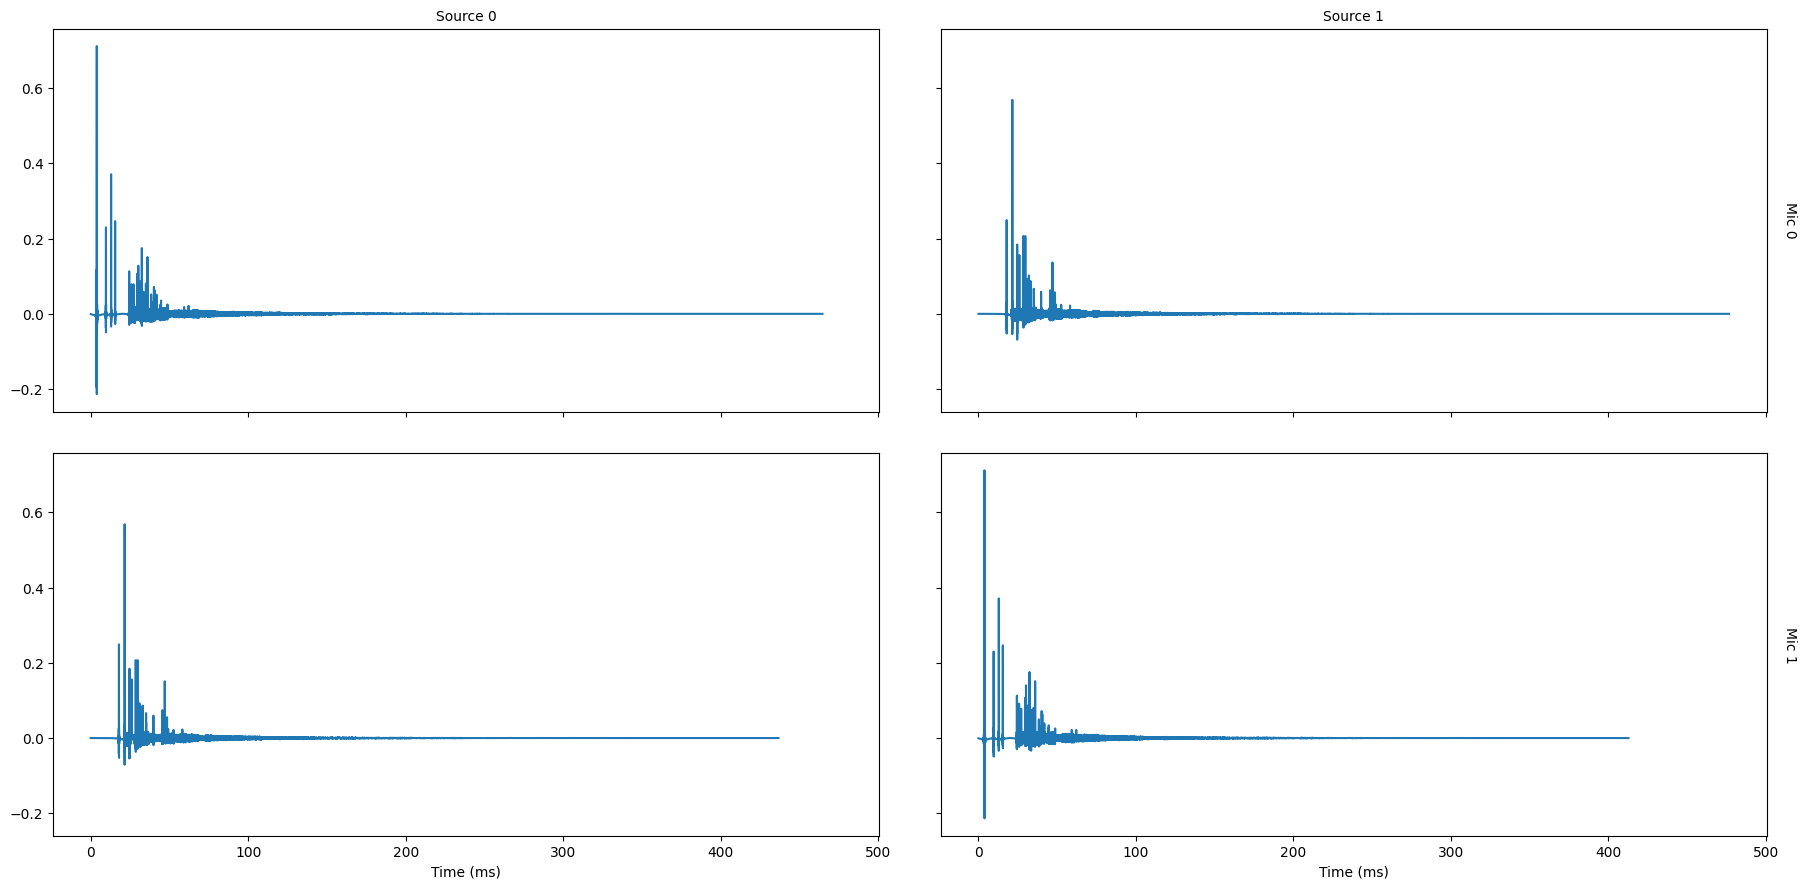

In [48]:
# Plot the room impulse response (RIR)
room.plot_rir()

# Get the current figure
fig = plt.gcf()

# Set the size of the figure for better visualization
fig.set_size_inches(20, 10)

In [49]:
room.simulate()

# INSPECT RECORDINGS

In [50]:
# Simulate propagation to first mic and play audio
print("Simulated propagation to first mic:")
display(Audio(room.mic_array.signals[0, :], rate=fs))

# Simulate propagation to second mic and play audio
print("Simulated propagation to second mic:")
display(Audio(room.mic_array.signals[1, :], rate=fs))


Simulated propagation to first mic:


Simulated propagation to second mic:


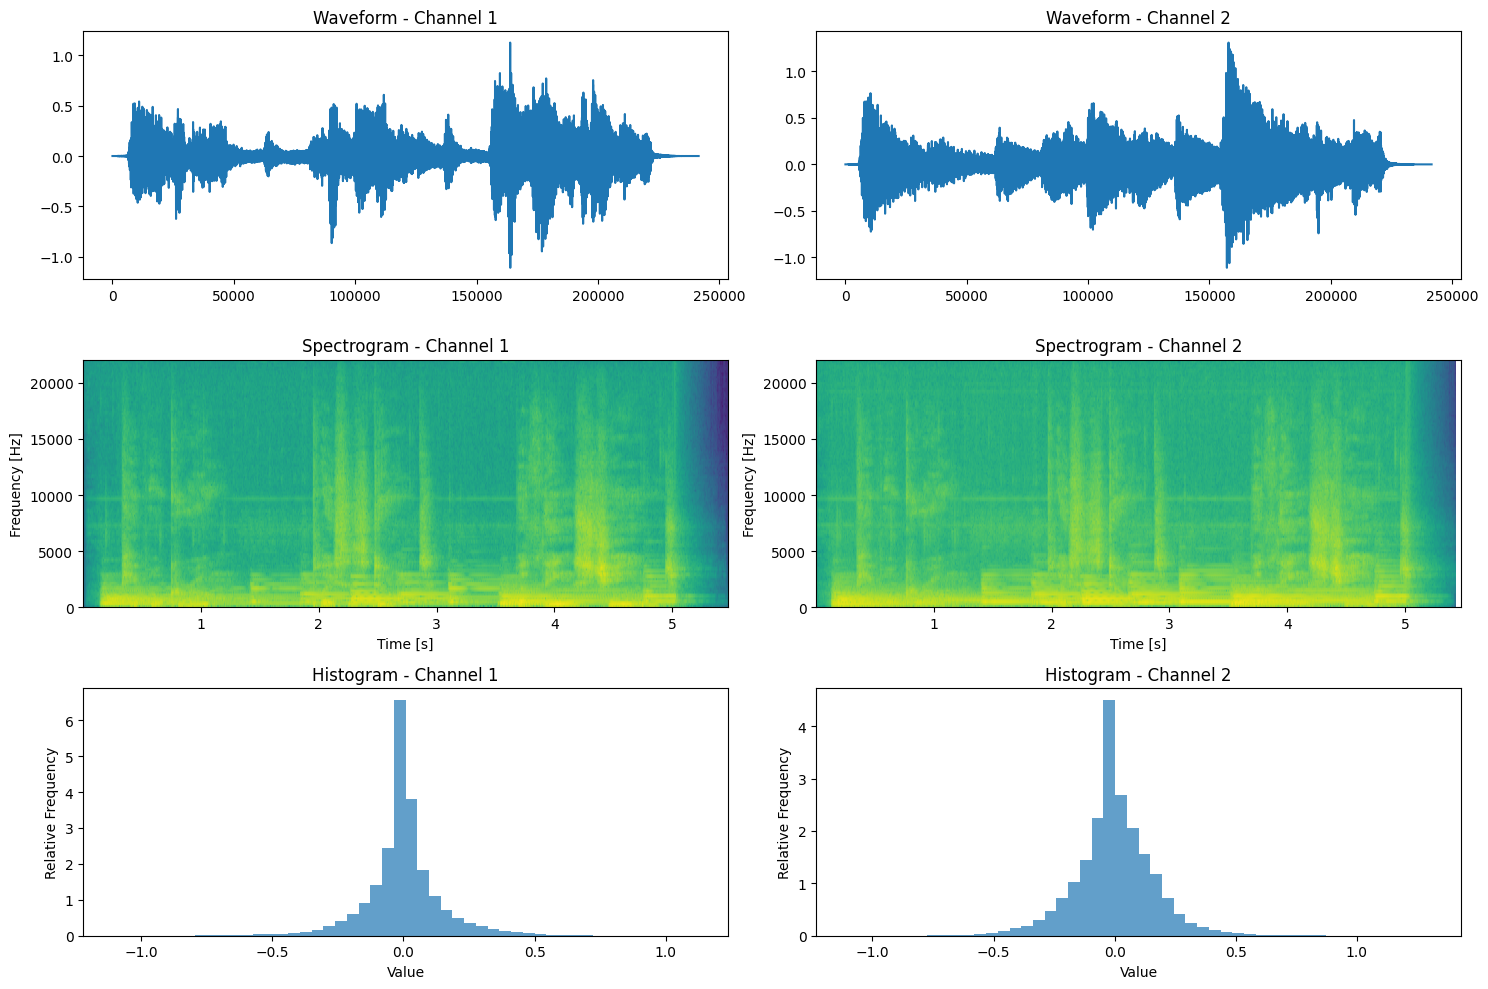

In [51]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Plot waveforms
for i in range(room.mic_array.signals.shape[0]):
    axs[0, i].plot(room.mic_array.signals[i])
    axs[0, i].set_title(f'Waveform - Channel {i+1}')

# Plot spectrograms
for i in range(room.mic_array.signals.shape[0]):
    axs[1, i].specgram(room.mic_array.signals[i], Fs=fs)
    axs[1, i].set_ylabel('Frequency [Hz]')
    axs[1, i].set_xlabel('Time [s]')
    axs[1, i].set_title(f'Spectrogram - Channel {i+1}')

# Plot histograms
for i in range(room.mic_array.signals.shape[0]):
    axs[2, i].hist(room.mic_array.signals[i], bins=50, density=True, alpha=0.7)
    axs[2, i].set_xlabel('Value')
    axs[2, i].set_ylabel('Relative Frequency')
    axs[2, i].set_title(f'Histogram - Channel {i+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# FastICA 

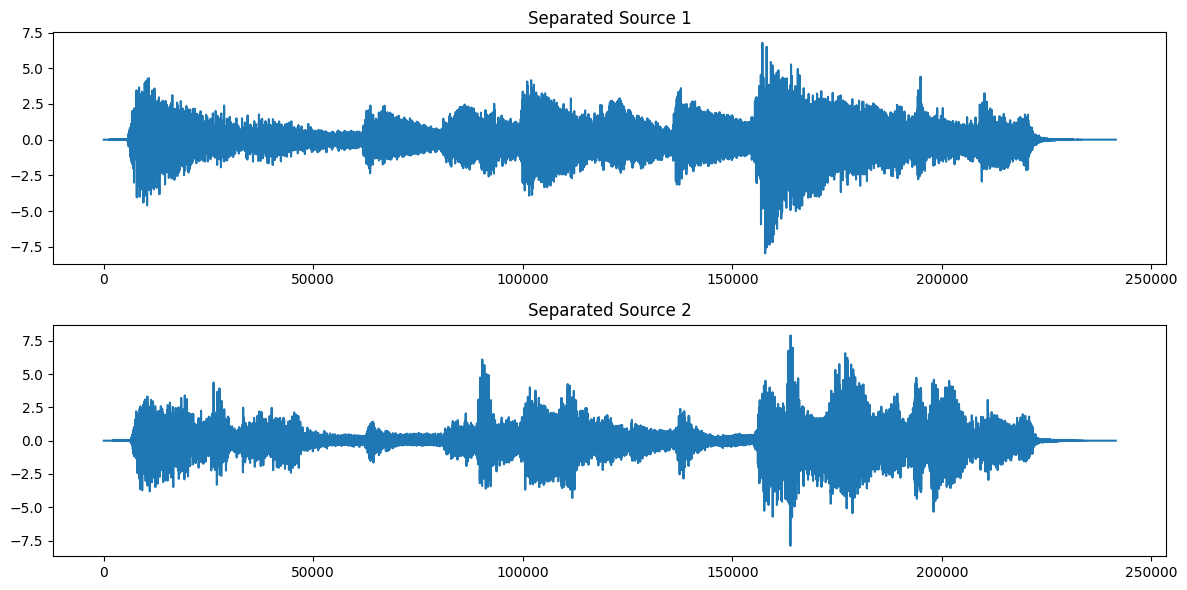

In [54]:

# Transpose the signals matrix to have the shape (num_samples, num_channels)
signals = room.mic_array.signals.T

# Apply FastICA to separate the sources
ica = FastICA(n_components=2 )
sources = (ica.fit_transform(signals)).T

# Plot the separated sources
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(sources[0, :])
plt.title('Separated Source 1')

plt.subplot(2, 1, 2)
plt.plot(sources[1, :])
plt.title('Separated Source 2')

plt.tight_layout()
plt.show()


In [55]:
# Simulate propagation to first mic and play audio
print("Simulated propagation to first mic:")
display(Audio(sources[0, :], rate=fs))

# Simulate propagation to second mic and play audio
print("Simulated propagation to second mic:")
display(Audio(sources[1, :], rate=fs))

Simulated propagation to first mic:


Simulated propagation to second mic:


# Nuova sezione